This examples show the features of the class LayeredEncodingCircuit that can be used for a simple
custom creation of new encoding circuits.

In [1]:
import numpy as np
from squlearn.encoding_circuit.layered_encoding_circuit import LayeredEncodingCircuit, Layer

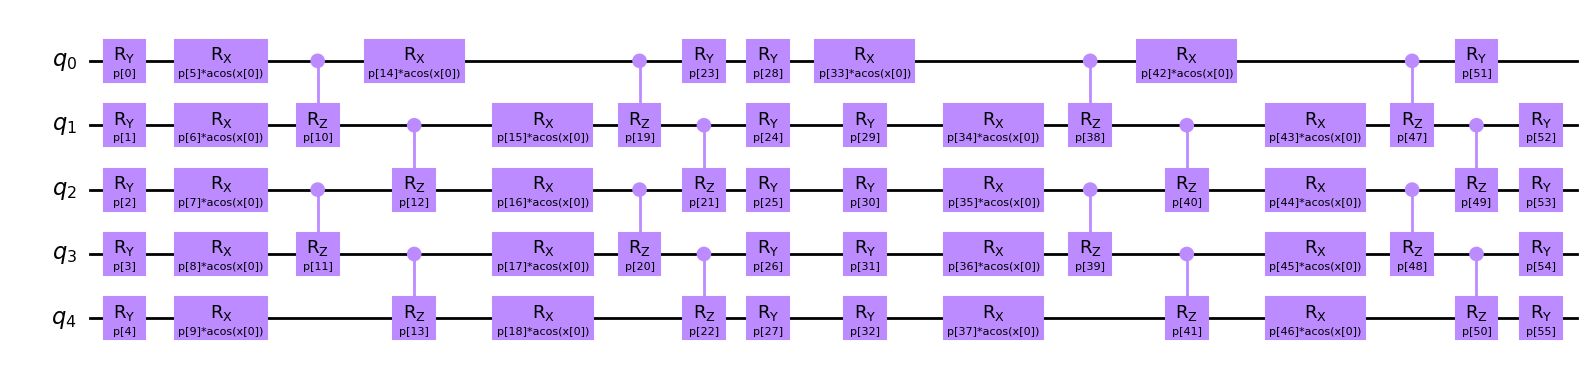

In [2]:
# Build a layered encoding circuit from a string;
# default strings are "x" for input data and "p" for parameters.
# Sequences of gates can be repeated using the notation N[...] where N is the number of repetitions.
# Custom encodings can be implemented by for example Rx(p,x;=p*np.arccos(x),{p,x}),
# in which the function following "=" is the encoding function based on the variables in the curly brackets.
# The resulting encoding circuit can be used as a repeateable layer where num_layers specifies the number of repetitions.

lfm = LayeredEncodingCircuit.from_string(
    "Ry(p)-2[Rx(p,x;=p*np.arccos(x),{p,x})-crz(p)]-Ry(p)",
    num_qubits=5,
    num_features=1,
    num_layers=2,
)
lfm.draw("mpl")

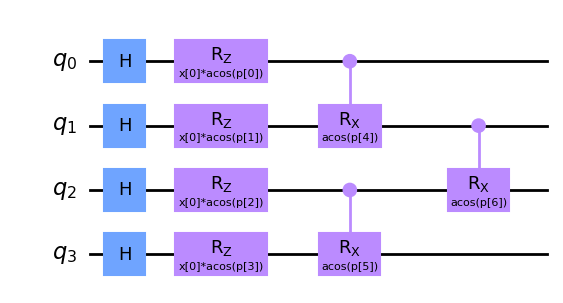

In [3]:
# Build a layered encoding circuit from qiskit inspired commands
# Single qubit gates are applied to all qubits
# Two qubit gates are applied either in a all-to-all or a nearest neighbor arrangement
# Encoding maps can be specified by a custom python function

lfm2 = LayeredEncodingCircuit(4, 1)


def multiply_with_arccos(x, y):
    return x * np.arccos(y)


lfm2.H()
lfm2.Rz("x", "p", encoding=multiply_with_arccos)
lfm2.crx_entangling("p", encoding=np.arccos)
lfm2.draw("mpl")

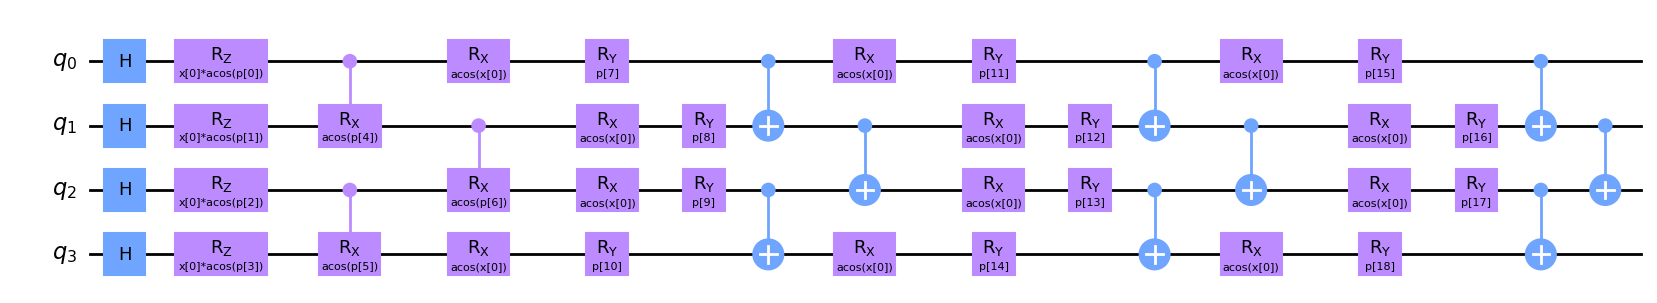

In [4]:
# Create a Layer that is repeated multiple times

# Creates the layer associated with encoding circuit lfm2
layer = Layer(lfm2)
layer.Rx("x", encoding=np.arccos)
layer.Ry("p")
layer.cx_entangling()

# Add the layer to the encoding circuit lfm2
lfm2.add_layer(layer, num_layers=3)
lfm2.draw("mpl")